In [22]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(
    './data/Meteorite_Landings.csv',
    index_col=1
)
df

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
id,,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
2,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
6,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
10,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
370,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...
31356,Zillah 002,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
30409,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
30410,Zlin,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45716 entries, 1 to 30414
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   nametype     45716 non-null  object 
 2   recclass     45716 non-null  object 
 3   mass (g)     45585 non-null  float64
 4   fall         45716 non-null  object 
 5   year         45425 non-null  float64
 6   reclat       38401 non-null  float64
 7   reclong      38401 non-null  float64
 8   GeoLocation  38401 non-null  object 
dtypes: float64(4), object(5)
memory usage: 3.5+ MB


I am interested in seeing the years with the most meteorite landings according to this dataset from Nasa

<AxesSubplot: >

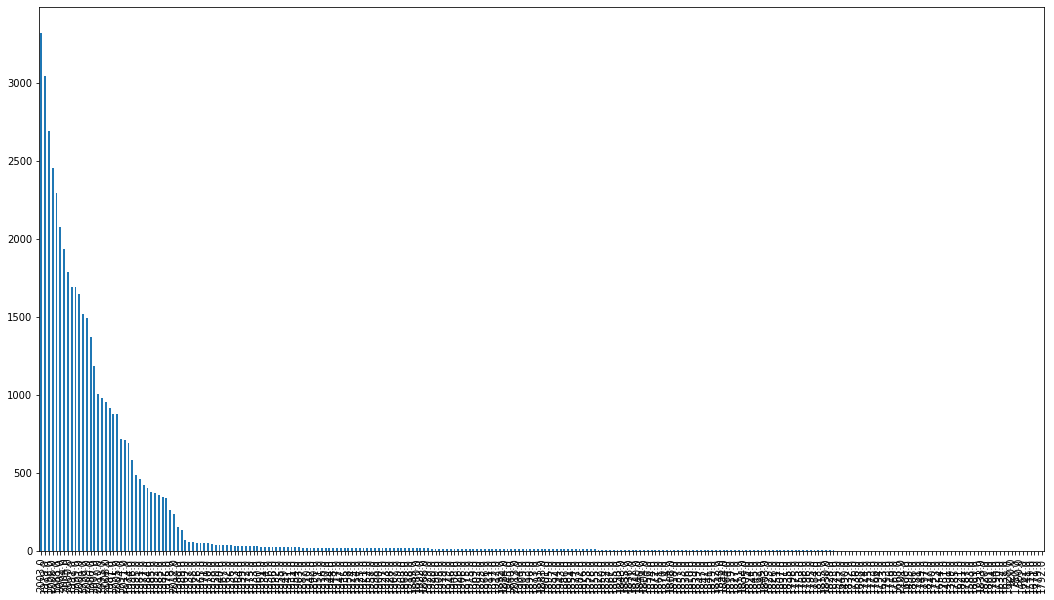

In [4]:
df['year'].value_counts().plot(kind='bar', figsize=(18,10))

This chart is absaloutely unusable due to the wide range of years available and there is simply too many.

In [5]:
year_counts = df['year'].value_counts()
year_counts.describe()

count     265.000000
mean      171.415094
std       505.545941
min         1.000000
25%         2.000000
50%        10.000000
75%        22.000000
max      3323.000000
Name: year, dtype: float64

In [6]:
# lets do the same thing as the above chart but lets look at the upper quartile for the data for the most common years
year_counts = year_counts[year_counts > 22].index 
years_filtered_df = df[df['year'].isin(year_counts)]
years_filtered_df

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
id,,,,,,,,,
10,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
390,Adzhi-Bogdo (stone),Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.83333, 95.16667)"
423,Aioun el Atrouss,Valid,Diogenite-pm,1000.0,Fell,1974.0,16.39806,-9.57028,"(16.39806, -9.57028)"
426,Akaba,Valid,L6,779.0,Fell,1949.0,29.51667,35.05000,"(29.51667, 35.05)"
433,Akyumak,Valid,"Iron, IVA",50000.0,Fell,1981.0,39.91667,42.81667,"(39.91667, 42.81667)"
...,...,...,...,...,...,...,...,...,...
31356,Zillah 002,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
30409,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
30410,Zlin,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"


<AxesSubplot: >

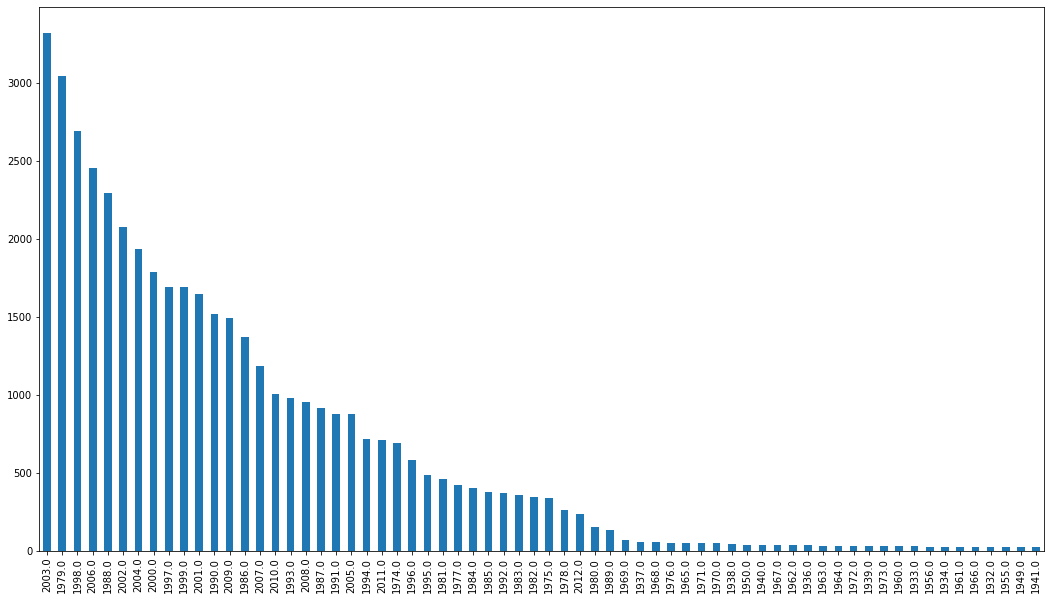

In [7]:
years_filtered_df['year'].value_counts().plot(kind='bar', figsize=(18,10))

This bar graph gives a much better view for the years with the most amount of meteorite landings.

In [8]:
# Similar process for seeing the type of meteorite that is most common.
class_counts = df['recclass'].value_counts()
class_counts.describe()

count     466.000000
mean       98.103004
std       641.800004
min         1.000000
25%         1.000000
50%         4.000000
75%        17.000000
max      8285.000000
Name: recclass, dtype: float64

<AxesSubplot: >

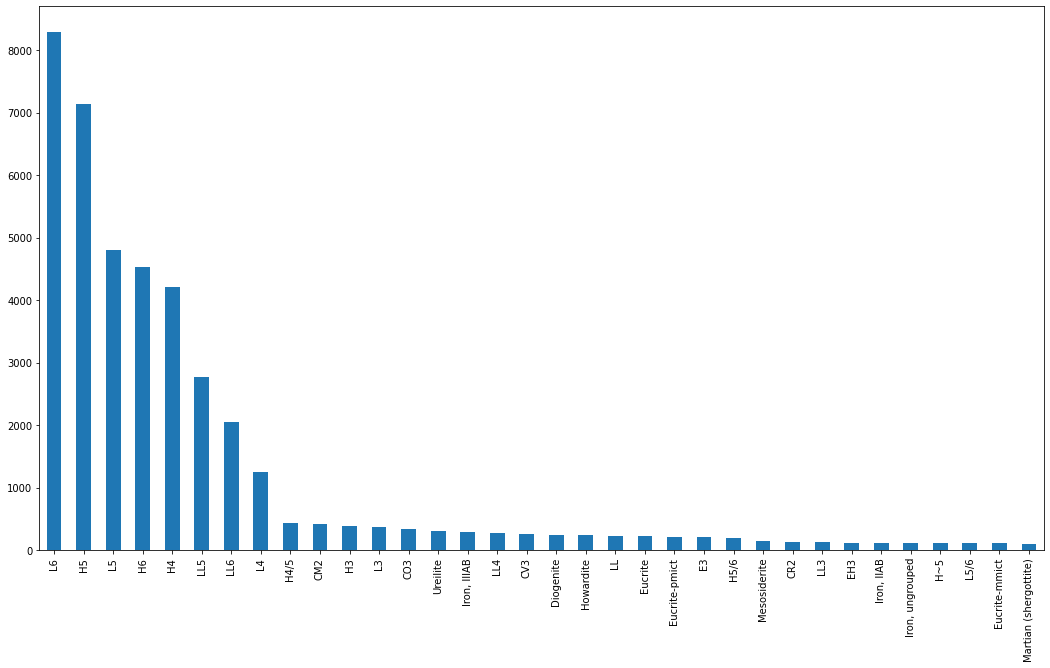

In [9]:
# This time filtering out by the mean of meteorite classes.
class_counts = class_counts[class_counts > class_counts.mean()].index 
class_filtered_df = df[df['recclass'].isin(class_counts)]
class_filtered_df['recclass'].value_counts().plot(kind='bar', figsize=(18,10))

### Information on meteorite classification: 
[NASA meteorite classification chart](https://curator.jsc.nasa.gov/Education/classification.cfm)  
From this chart we can see that the H, L, and LL classifications fall under the undifferentiated meteorites that are ordinary chondrites. These take up the first 9 spots for the most common classification, before a Carbonaceous chondrite shows up in the 10th spot with CM2. The numbers associated the the H, L, and LL classifications are subcategories for those groups. 

The L6 is the most common meteorite kind and the 6 refers to a meteorite that has "been metamorphosed under conditions sufficient to homogenize all mineral compositions, convert all low-Ca pyroxene to orthopyroxene, coarsen secondary phases such as feldspar to sizes ≥50 µm, and obliterate many chondrule outlines; no melting has occurred" ([Meteoritical Society](https://www.lpi.usra.edu/meteor/metbullclass.php?sea=L6)).


---

Now I am interested in being able to see the locations for the meteorite landings.

<AxesSubplot: xlabel='reclong', ylabel='reclat'>

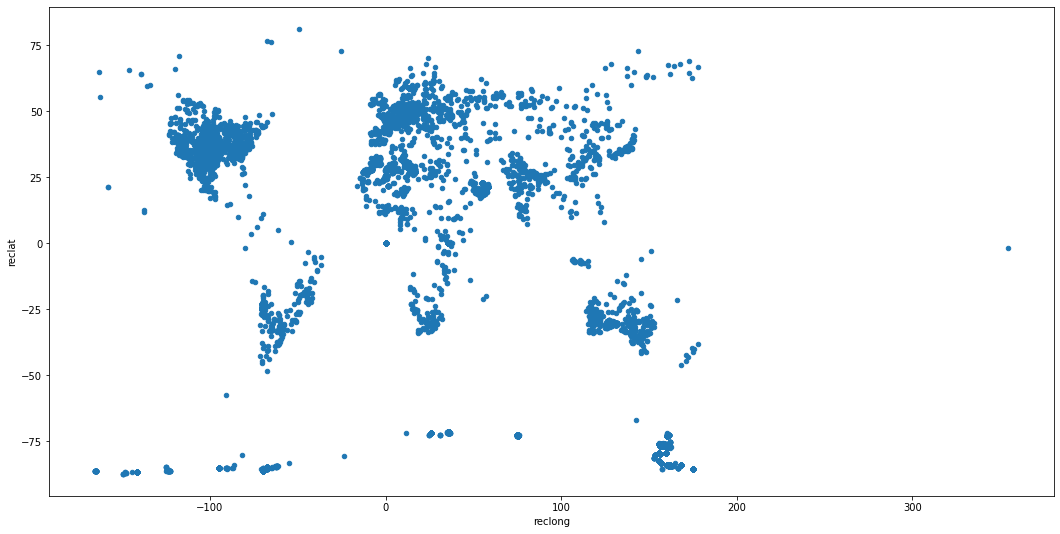

In [10]:
# We know that reclat and reclong have null values so we will just not plot those values
lat_long_df = df.dropna(subset=['reclat', 'reclong'])

lat_long_df.plot(kind='scatter', x='reclong', y='reclat', figsize=(18,9))


While it is expected, it is fun to see the outline of the world map for the meteorite landings!  
However, there does seem to be the lone meteorite with the longitude of over 300 (and possibly over the expected values of -180 to 180 for W/E), which seems weird since the globe is round and going East off of Asia would have you wrap back around, so that meteorite should be more with the others maybe? Possible that this should be recorded as -120 to place it at 120W. 


In [11]:
# seems like the minimum is within the expected 180 degrees
lat_long_df['reclong'].describe()

count    38401.000000
mean        61.074319
std         80.647298
min       -165.433330
25%          0.000000
50%         35.666670
75%        157.166670
max        354.473330
Name: reclong, dtype: float64

In [12]:
# the min and max are within the 90 degrees expected for latitude.
lat_long_df['reclat'].describe()

count    38401.000000
mean       -39.122580
std         46.378511
min        -87.366670
25%        -76.714240
50%        -71.500000
75%          0.000000
max         81.166670
Name: reclat, dtype: float64

In [13]:
# This is the meteorite that is the apparent outlier on the scatterplot
lat_long_df[lat_long_df['reclong'] == lat_long_df['reclong'].max()]

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
id,,,,,,,,,
32789,Meridiani Planum,Valid,"Iron, IAB complex",NaN,Found,2005.0,-1.94617,354.47333,"(-1.94617, 354.47333)"


The meridiani planum is a large area on Mars that is one of the most investigated regions, and there was a Iron meteorite found on this area, and it was "the first meteorite found on another planet" ([mindat.org](https://www.mindat.org/loc-232105.html)).

<AxesSubplot: >

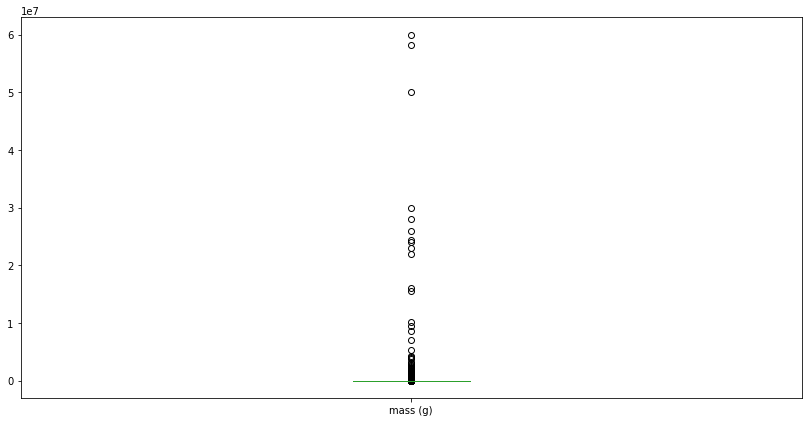

In [15]:
df['mass (g)'].plot(kind='box', figsize=(14,7))

This box plot is not very useful for us at all, lets investigate.

In [16]:
df['mass (g)'].describe()

count    4.558500e+04
mean     1.327808e+04
std      5.749889e+05
min      0.000000e+00
25%      7.200000e+00
50%      3.260000e+01
75%      2.026000e+02
max      6.000000e+07
Name: mass (g), dtype: float64

In [26]:
# using scipy to get z score for detecting outliers. Z score is a value for the standard deviations away from the mean an object is
z_scores = stats.zscore(df['mass (g)'])
# 3 is a common z score used, however using a smaller threshold does not change this.
mass_outliers = df[abs(z_scores) > 3]
print(mass_outliers)

Empty DataFrame
Columns: [name, nametype, recclass, mass (g), fall, year, reclat, reclong, GeoLocation]
Index: []


Using this method does not seem to come back with any outliers. Looking at the standard deviation, this makes sense as the spread is so wide. 

Lets try to use the Interquartile method for trying to find outliers, as this looks more promising looking at the above descriptive stats.

In [27]:
# Lower and upper bounds for outliers. using: Q1 - (1.5 * IQR), and Q3 + (1.5 * IQR)
lower_bound = df['mass (g)'].quantile(0.25) - 1.5 * (df['mass (g)'].quantile(0.75) - df['mass (g)'].quantile(0.25))
upper_bound = df['mass (g)'].quantile(0.75) + 1.5 * (df['mass (g)'].quantile(0.75) - df['mass (g)'].quantile(0.25))

# filtering out the outliers
mass_outliers = df[(df['mass (g)'] < lower_bound) | (df['mass (g)'] > upper_bound)]
print(mass_outliers)

             name nametype           recclass   mass (g)   fall    year  \
id                                                                        
2          Aarhus    Valid                 H6      720.0   Fell  1951.0   
6            Abee    Valid                EH4   107000.0   Fell  1952.0   
10       Acapulco    Valid        Acapulcoite     1914.0   Fell  1976.0   
370       Achiras    Valid                 L6      780.0   Fell  1902.0   
379      Adhi Kot    Valid                EH4     4239.0   Fell  1919.0   
...           ...      ...                ...        ...    ...     ...   
54609    Zhaoping    Valid  Iron, IAB complex  2000000.0  Found  1983.0   
30405    Zhigansk    Valid        Iron, IIIAB   900000.0  Found  1966.0   
30406  Zhongxiang    Valid               Iron   100000.0  Found  1981.0   
31355  Zillah 001    Valid                 L6     1475.0  Found  1990.0   
31357   Zubkovsky    Valid                 L6     2167.0  Found  2003.0   

         reclat    reclo

<AxesSubplot: >

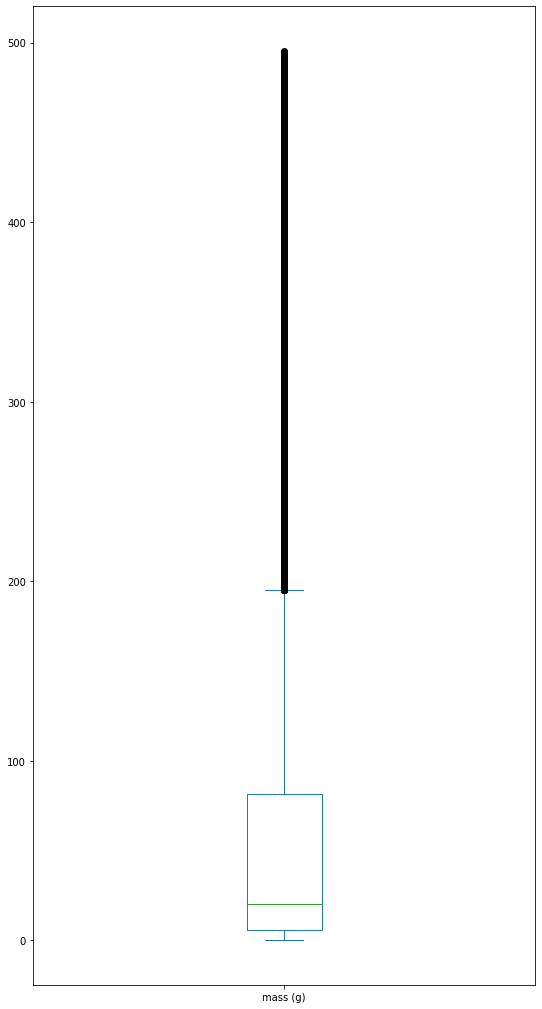

In [32]:
df['mass (g)'][(df['mass (g)'] > lower_bound) & (df['mass (g)'] < upper_bound)].plot(kind='box', figsize=(9, 18))

Through using the IQR, the box plot definetly is more visible now. Due to how varied the weights for the meteorites are, it seems like we still have a large amount of outliers on this box plot, and it seeme like there is a very large amount of small meteorite chunks that all weigh about the same, and then a very large amount of spread out meteorites found that weigh a lot. 